In [2]:
import lammps
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy import integrate
from scipy.constants import Boltzmann

plt.style.use("dark_background")

In [3]:
lmp = lammps.IPyLammps(
    cmdargs=[
        "-screen",
        "none",
        "-log",
        str("lammps.log"),
    ]
)

LAMMPS output is captured by PyLammps wrapper


In [4]:
# 1) Initialization
lmp.command("units lj")
lmp.command("dimension 3")
lmp.command("atom_style atomic")
lmp.command("pair_style lj/cut 2.5")
lmp.command("boundary p p p")

In [5]:
# 2) System definition
lmp.command("region simulation_box block -20 20 -20 20 -20 20")
lmp.command("create_box 2 simulation_box")
lmp.command("create_atoms 1 random 100 341341 simulation_box")
lmp.command("create_atoms 2 random 100 127569 simulation_box")

In [6]:
# 3) Simulation settings
lmp.command("mass 1 1")
lmp.command("mass 2 1")
lmp.command("pair_coeff 1 1 1.0 1.0")
lmp.command("pair_coeff 2 2 0.5 3.0")

In [7]:
# 4) Visualization
lmp.command("thermo 10")
lmp.command("thermo_style custom step temp pe ke etotal press")

In [8]:
# 5) Run
lmp.command("minimize 1.0e-4 1.0e-6 1000 10000")

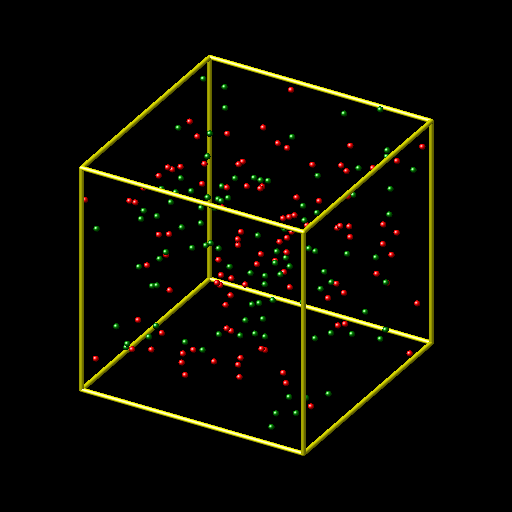

In [10]:
lmp.image(background_color="black")